In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

sns.set(rc={'figure.figsize':(11,7)})


def simulate_throwing_n_dice(n_dice, t_throws):
    throws = np.random.randint(1,7, size = (t_throws, n_dice))
    sum_throws = throws.sum(axis = 1)
    return sum_throws


def non_present_values(sum_throws, n_dice):
    sorted_elements = sorted(set(sum_throws))
    min_number = n_dice
    max_number = n_dice*6

    non_present = []
    for n in range(min_number, max_number + 1):
        if n not in sorted_elements:
            non_present.append(n)
    return non_present


def generate_plots(n_dice_list, t_throws_list, plot_type = "prob", make_gif = True, path = "png/medium/"):
    """If plot type = prob, plots generated show the probability distribution, if freq, show the count of the occurence"""
    
    png_files = []
    
    if plot_type not in ["prob", "freq"]:
        raise Exception("""plot_type not in ["prob", "freq"]""")
    
    for t_throws in tqdm(t_throws_list):
        for n_dice in n_dice_list:
            sum_throws = simulate_throwing_n_dice(n_dice, t_throws)
            if plot_type == "prob":
                stat = "probability"
            else:
                stat = "count"
            title = f"Distribution of the sum of {n_dice} dice thrown {t_throws:,} times"
            t_throws_str = str(t_throws).rjust(7,"0")
            n_dice_str = str(n_dice).rjust(2,"0")
            file_name = f"n={n_dice_str}_t={t_throws_str}_{plot_type}.png"
            png_files.append(file_name)
            g = sns.histplot(sum_throws, binwidth = 1, stat = stat, binrange = (n_dice, n_dice*6 + 1) )
            g.set_xticklabels(range(n_dice, 6*n_dice + 1))
            g.set(
                xlabel=f'Sum of {n_dice} dice',
                ylabel = f'Ocurrence')
            if plot_type == "prob":
                g.set(
                    #ylim=(0, 0.4),
                    ylabel = f'Probability')
                
            g.get_figure().savefig(f"{path}{file_name}")
            plt.clf()
    gif_name = f"n=({min(n_dice_list)},{max(n_dice_list)})_t=({min(t_throws_list)},{max(t_throws_list)})_{plot_type}"
    if make_gif:
        gif_name = f"{path}{gif_name}.gif"
        generate_gif(png_files, gif_name, True)
        png_files.append(gif_name)
    return png_files
        
            
            
import imageio, os
def generate_gif(files, gif_name, sort = False, duration = 0.8, path = "png/medium/"):
    if sort:
        files = sorted(files)
    images = []
    for filename in files:
        if filename.endswith(".png"):
            images.append(imageio.imread(f"{path}{filename}"))
    imageio.mimsave(gif_name, images,  duration=duration)
    return 

from IPython.display import Image, display
def plot_gif(gif):
    with open(gif,'rb') as f:
        display(Image(data=f.read(), format='png'))

ModuleNotFoundError: No module named 'imageio'

In [2]:
t = np.array([10**i for i in range(2,7)])
t = np.append(t, t/2).astype(int)
t.sort()
print(t)

[     50     100     500    1000    5000   10000   50000  100000  500000
 1000000]


In [183]:
files = generate_plots([2],t)

100%|██████████| 10/10 [00:02<00:00,  4.44it/s]


<Figure size 792x504 with 0 Axes>

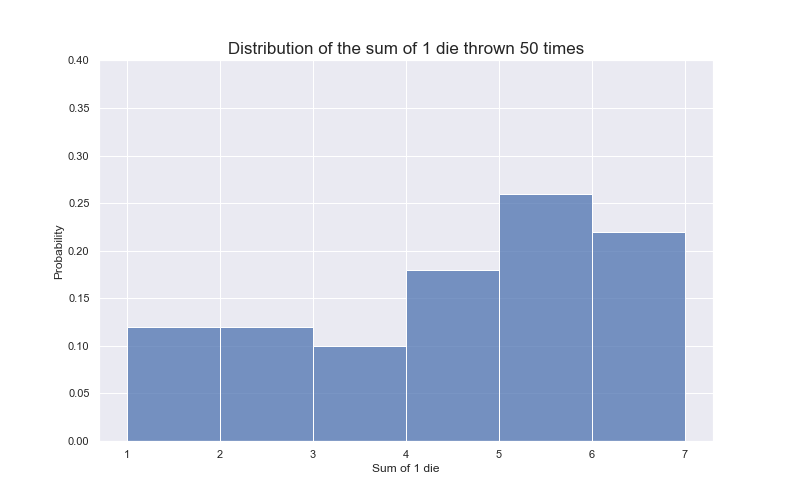

In [179]:
plot_gif(files[-1])

In [224]:
n = np.arange(1,15)
print(n)
files = generate_plots(n, [1_000_000])


  0%|          | 0/1 [00:00<?, ?it/s]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]



100%|██████████| 1/1 [00:08<00:00,  8.89s/it]


<Figure size 792x504 with 0 Axes>

In [217]:
df = pd.DataFrame(columns = np.arange(1,7), index = np.arange(1,7))
df.rename_axis(index = "die 1", columns = "die_2", inplace = True)
for i, row in df.iterrows():
    df.loc[i] = row.index.values + i

In [219]:
def color_negative_red(val):
    color = 'red' if val == 7 else 'black'
    return 'color: %s' % color
df.style.applymap(color_negative_red)    

die_2,1,2,3,4,5,6
die 1,,,,,,
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [80]:
t_throws = 10
n_dice = 5
throws = np.random.randint(1,7, size = (t_throws, n_dice))
df = pd.DataFrame(throws)
df.columns = [f"die {i}" for i in range(1, n_dice + 1)]
df["sum"] = df.sum(axis =1)
df.index = range(1,t_throws + 1)
df = df.rename_axis(index = "throw")
df

,die 1,die 2,die 3,die 4,die 5,sum
throw,,,,,,
1,2,3,5,1,4,15
2,5,3,6,4,2,20
3,1,5,4,5,6,21
4,6,4,1,4,3,18
5,6,1,4,6,4,21
6,2,2,3,1,2,10
7,1,3,2,3,3,12
8,3,3,6,3,4,19
9,5,4,3,1,5,18


In [ ]:
t_throws = 1_000_000
sum_throws_list = np.array([])
n_dice_list = np.arange(1,15)
for n_dice in n_dice_list:
    sum_throws = simulate_throwing_n_dice(n_dice, t_throws)
    sum_throws_list = np.append(sum_throws_list, sum_throws)
    
sns.histplot(sum_throws_list, binwidth = 1, stat = "probability", binrange = (1, n_dice_list.max()*6 + 1) )


In [17]:
n_dados_list = [1,2,5,10,15]
n_tiradas_por_dado = 10_000_000
n_tiradas_por_dado_list = [50, 100, 200, 500, 750, 1000,1250, 5000, 7500, 
                           10_000,50_000,100_000, 500_000, 1_000_000, 5_000_000]

In [39]:
stats = {}
n_dados_max = 16

n_dados_list = range(1,n_dados_max)
n_tiradas_por_dado_list = [100, 1_000_000]
for n_dados in n_dados_list:
    for n_tiradas_por_dado in n_tiradas_por_dado_list:
        suma_dados = simulador_tirar_n_dados(n_dados, n_tiradas_por_dado)
        stats[(n_dados, n_tiradas_por_dado)] = {"mean" : suma_dados.mean(), "std" : suma_dados.std(), "var" : suma_dados.var()}

df_stats = pd.DataFrame(stats).T

In [40]:
df_stats.index.set_names(["n_dados", "n_tiradas_por_dado"], inplace = True)
#df_stats.to_csv("stats_dados_2_precisiones.csv")

In [53]:
precise = df_stats.xs(1_000_000, level=1)

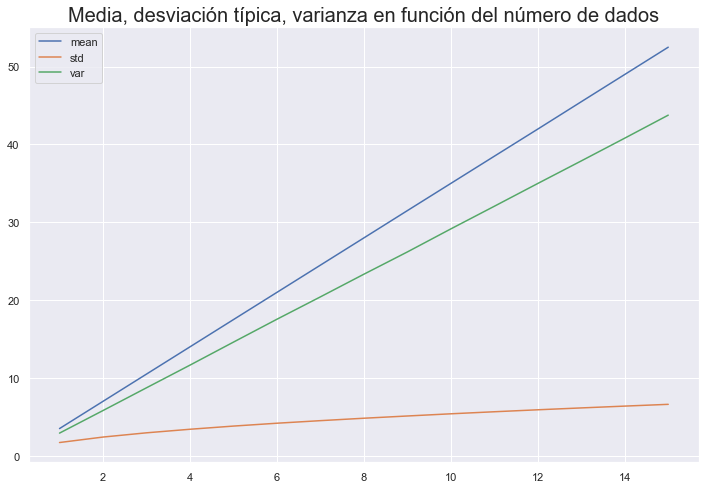

In [34]:
ax = precise.plot().set_title("Media, desviación típica, varianza en función del número de dados", size = 20)
fig = ax.get_figure()
fig.savefig('mean_std_var_n_dados_100.png')

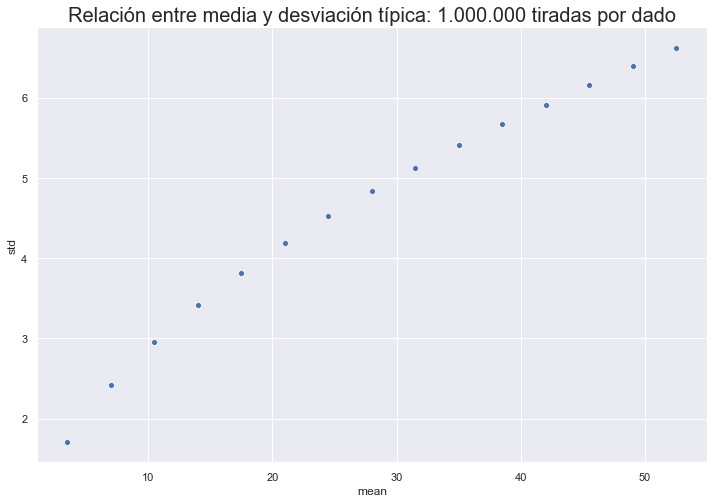

In [56]:
ax  = sns.scatterplot(precise["mean"],precise["std"] ).set_title("Relación entre media y desviación típica: 1.000.000 tiradas por dado", size = 20)
fig = ax.get_figure()
#fig.savefig('mean_vs_std_1_000_000.png')

Probabilidad de que salgan todos los dados = 3

In [180]:
import imageio, os
images = []
filenames =sorted([filename for filename in os.listdir("./png/")])
for filename in filenames:
    if filename.endswith(".png"):
        images.append(imageio.imread(f"png/{filename}"))
imageio.mimsave("png/distribution_tiradas.gif", images,  duration=0.5)

# Combinatorics



$$
P(s,n) = \frac{1}{6^n}\sum_{k=0}^{(s-n)/6}(-1)^k\binom{n}{k}\binom{s-6k-1}{n-1}
$$


comprobar si esa ecuación tiende a la normal con media 3.5 y varianza v cuando n -> inf .... prob [s,s+1)

In [24]:
import math, numpy as np
from math import factorial as fact
import statistics as stats

def prob_of_sum_gaussian(s,n):
    mean = 3.5*n
    std = np.sqrt(n*105/36)
    normal_dist = stats.NormalDist(mean, std)
    return normal_dist.pdf(s)

def prob_of_sum_combinatorics(s,n):
    prob = 0
    k = np.floor((s - n)/6).astype(int)
    for i in range(0,k + 1):
        prob += (-1)**(i) * math.comb(n,i) * math.comb(s - 6*i - 1,n - 1)
    return np.divide(prob,6**n)

def prob_of_sum_experimental(s,n, throws = 1_000_000):
    sum_throws = simulate_throwing_n_dice(n, throws)
    return np.divide((sum_throws == s).sum(),throws)

def simulate_throwing_n_dice(n_dice, t_throws):
    throws = np.random.randint(1,7, size = (t_throws, n_dice))
    sum_throws = throws.sum(axis = 1)
    return sum_throws

s = 19
n = 4
p_exp   = prob_of_sum_experimental(s,n, throws = 1_000_000)
p_comb  = prob_of_sum_combinatorics(s,n)
p_gauss = prob_of_sum_gaussian(s, n)
print(p_exp)
print(p_comb)
print(p_gauss)

In [133]:
probs = []
decimals = 3
max_sum = 76
min_sum = 10
max_dice = 19
min_dice = 1
s_step = 6
n_step = 1
for s in range(min_sum,max_sum, s_step):
    for n in range(min_dice,min(max_dice, s), n_step):
        p_comb  = prob_of_sum_combinatorics(s, n)
        p_gauss = prob_of_sum_gaussian(s, n)
        probs.append({"n" : n, "s" : s, "probability_gaussian":p_gauss, "probability_combinatorics" : p_comb})
        

In [ ]:
pd.DataFrame

In [135]:
probs_df = pd.DataFrame(probs)

In [138]:
probs_df["error"] = 1

In [139]:
probs_df

,n,s,probability_gaussian,probability_combinatorics,error
0,1,10,0.000167,0.000000,1
1,2,10,0.076370,0.083333,1
2,3,10,0.132954,0.125000,1
3,4,10,0.058835,0.061728,1
4,5,10,0.015185,0.016204,1
...,...,...,...,...,...
181,14,70,0.000282,0.000220,1
182,15,70,0.001821,0.001752,1
183,16,70,0.007151,0.007266,1
184,17,70,0.018638,0.018959,1


In [136]:
pivot = probs_df.pivot(index = "n", columns = "s", values = ["probability_gaussian", "probability_combinatorics"]).fillna(0)
style = pivot.style.background_gradient(cmap = "GnBu", axis = None)
style.precision = decimals
style

In [137]:
error = abs(pivot["probability_combinatorics"] - pivot["probability_gaussian"])
style = error.style.background_gradient(cmap = "Reds", axis = None)
style.precision = 5
style

s,10,16,22,28,34,40,46,52,58,64,70
n,,,,,,,,,,,
1,0.00017,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00696,0.00016,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00795,0.00383,0.00007,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00289,0.00195,0.00020,0.00003,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,0.00102,0.00219,0.00184,0.00046,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,0.00031,0.00148,0.00221,0.00137,0.00031,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,0.00021,0.00073,0.00077,0.00006,0.00034,0.00015,0.00000,0.00000,0.00000,0.00000,0.00000
8,0.00006,0.00011,0.00100,0.00165,0.00100,0.00011,0.00006,0.00000,0.00000,0.00000,0.00000
9,0.00001,0.00017,0.00052,0.00018,0.00069,0.00073,0.00018,0.00002,0.00000,0.00000,0.00000


In [195]:
s_min, s_max = 1,30
n = 4
x_gauss = np.linspace(s_min, s_max, retstep = 0.1)[0]
p_gauss = np.array([prob_of_sum_gaussian(i,n) for i in x_gauss])
x_comb = range(s_min, s_max + 1)
p_comb = np.array([prob_of_sum_combinatorics(i,n) for i in x_comb])

In [196]:
import seaborn as sns

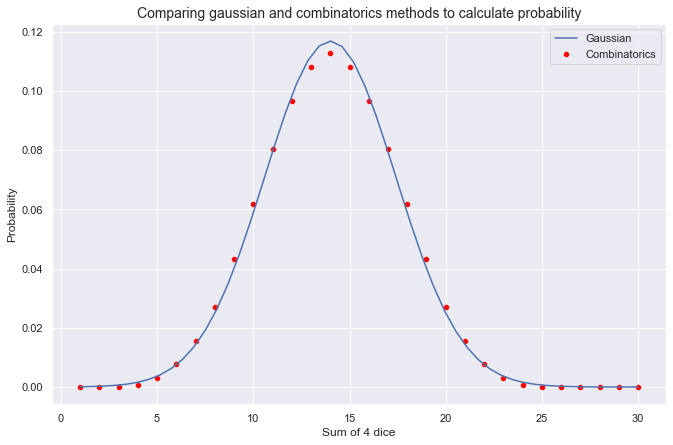

In [221]:
sns.lineplot(x = x_gauss, y = p_gauss)
g = sns.scatterplot(x = x_comb, y = p_comb, color = "red")
g.set(
    xlabel=f'Sum of 4 dice',
    ylabel = f'Probability')
g.set_title("Comparing gaussian and combinatorics methods to calculate probability", size = 14)
g.legend(["Gaussian", "Combinatorics"])

In [222]:
g.get_figure().savefig("gauss_vs_comb.png")

In [14]:
sum_throws = simulate_throwing_n_dice(10, 1_000_000)

In [8]:
prob_of_sum_gaussian(14.7,4.2)

0.11398350868612361

Text(0, 0.5, 'Sum of dice')

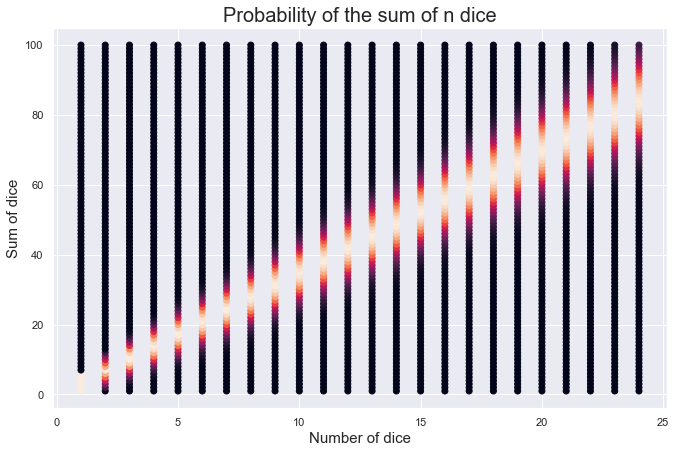

In [105]:
n,s = (24, 100)
s_array = np.arange(1,s + 1)
n_array = np.arange(1,n + 1)

s_n_dict = {}
for s in s_array:
    s_dict = {}
    for n in n_array:
        p = prob_of_sum_combinatorics(s,n)
        s_dict[n] = p
    s_n_dict[s] = s_dict

df = pd.DataFrame(s_n_dict)
for i in range(1,n+1):
    index = i * np.ones(s)
    scatter = plt.scatter(index, df.columns.values, c= df.loc[i])
ax = plt.gca()
ax.set_title('Probability of the sum of n dice', size = 20)
ax.set_xlabel( 'Number of dice', size = 15)
ax.set_ylabel( 'Sum of dice', size = 15)


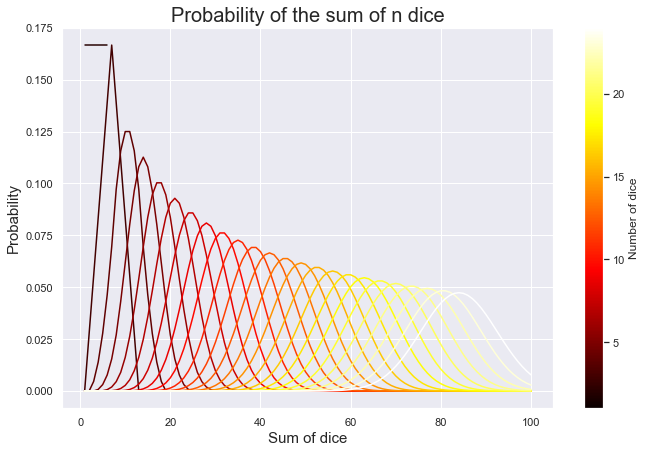

In [148]:
path = "/Users/juanluis/Documents/central-limit-theorem-with-dice/article/"
from matplotlib import cm, colors
for i in range(1,n+1):
    x = df.loc[i]
    if i == 1:
        x = x[:6]
    plt.plot(x, c=cm.hot(i/n))
ax = plt.gca()
ax.set_title('Probability of the sum of n dice', size = 20)
ax.set_ylabel( 'Probability', size = 15)
ax.set_xlabel( 'Sum of dice', size = 15)

norm = colors.Normalize(vmin=1, vmax=n)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.hot),
              orientation='vertical', label='Number of dice')
plt.savefig(path + "prob_sum_n_dice.png", dpi = 300)

In [152]:
rolls = {}
for i in range(1,n+1):
    rolls[i] = simulate_throwing_n_dice(i, 100_000)/i

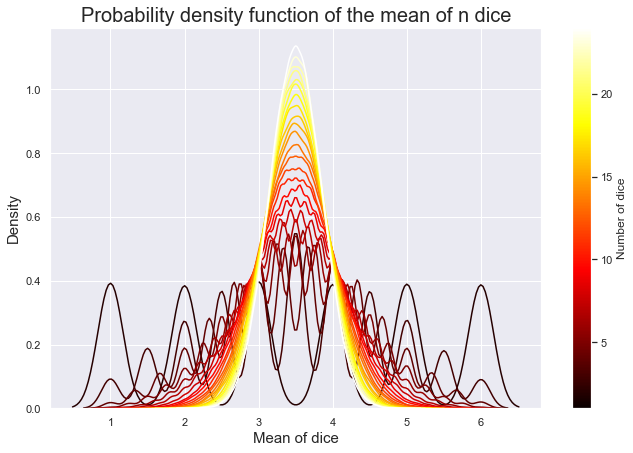

In [153]:
for i in range(1,n+1):
    x = rolls[i]
    sns.kdeplot(x,color = cm.hot(i/n))
ax = plt.gca()
ax.set_title('Probability density function of the mean of n dice', size = 20)
ax.set_ylabel( 'Density', size = 15)
ax.set_xlabel( 'Mean of dice', size = 15)
norm = colors.Normalize(vmin=1, vmax=n)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.hot),
              orientation='vertical', label='Number of dice')
plt.savefig(path + "prob_density_mean_n_dice.png", dpi = 300)

https://www.lucamoroni.it/the-dice-roll-sum-problem/
https://mathworld.wolfram.com/Dice.html

In [8]:
def iter_gauss(k, x):
    c = 1/np.sqrt(np.pi)
    num = (x - 7/2)**(2*k)
    den = (np.sqrt(2)*105/36)**(2*k+1)
    return c*num/den

def iter_comb(k, x, n = 10):
    c = 1/np.power(6,n)
    num = fact(x - 6*k - 1) * n
    den = fact(x - 6*k - n) * fact(n - k)
    return c*num/den

def coef_gauss(n):
    return np.divide(1,6**n)
def coef_comb(n):
    return np.divide(1,np.sqrt(n*2*np.pi*105/36))
t = 10
coef_comb(t)/coef_gauss(t)


k = 10
x = 30
it_c = iter_comb(k,x)
it_g = iter_gauss(k,x)